# Part 1. 키워드를 활용한 텍스트 마이닝

## 0.  텍스트마이닝 정의

### 텍스트 마이닝 이란? 
    *텍스트(데이터) + (데이터) 마이닝  = 텍스트 마이닝*
    
   #### 데이터의 종류 : 
        정형 데이터 : 일반적으로 사용하는 테이블 형태의 데이터 
            행과 열로 구성 : 행은 하나의 데이터를 의미 한다. 열은 데이터에서 하나의 속성(attribute)를 의미한다. 
               
        비정형 데이터 : 일반적으로 상요하는 테이블 형태의 데이터가 아닌 데이터
            ex) 텍스트, 이미지, 음성, 동영상 등 
    
   #### 데이터 마이닝 : 데이터에서 가치를 뽑아내는 기술
       통계적 기법이나 머신러닝기법 들을 이용하여 데이터에 숨겨져 있는 패턴이나 통계적인 규칙을 찾는 기술
  
### 텍스트 마이닝 과정
    1. 텍스트 수집
    2. 텍스트 전처리
    3. 텍스트 분석 
    4. 텍스트 시각화
       

## 1. 텍스트 수집

#### 수집의 종류
1. 다운로드
    데이터 저장소
        (영어 데이터)
        - http://www.kaggle.com/datasets 
        - https://archive.ics.uci.edu/ml/index.php : UC Irvine대학의 machine learning을 위한 데이터 저장소
        - http://ana.cachopo.org/datasets-for-single-label-text-categorization : 논문 연구에서 사용할 수 있는 분류용 테스트 데이터
        - https://course.fast.ai/datasets : Fast.ai에서 제공하는 딥러닝 학습용 대용량 데이터
         (한국어 데이터)
        - https://korquad.github.io : LG CNS에서 공개한 한국어 질의응답 데이터
        - https://ithub.korean.go.kr/user/guidcourpus/guide1.do : 국립국어원에서 공개한 세종 코퍼스
        - https://konlpy-ko.readthedocs.io/v0.5.1/data : 파이썬 한국어 처리 라이브러리 konlpy에서 제공하는 데이터
        - http://aiopen.etri.re.kr/service_dataset.php : ETRI에서 공개한 언어처리 학습데이터
  
2. 크롤링
        - 웹 페이지에 있는 텍스트를 긁어오는 것
        - HTML 소스에서 해당 텍스트 정보를 긁어오는 것
        - 텍스트, 이미지, 하이퍼링크 모두 가능 (단, 웹 페이지 관리자가 허락하는 경우)


## 2. 텍스트 전처리
: ***컴퓨터가 이해하지 못하는 텍스트의 특징***을 알 수 있게 해주는 작업이다. 

#### 순서
**1. 토큰화** : 텍스트를 정해진 단위로 나누기
    ex) Paint a picture for you and me on the days when we were young.
        단위) 1. 단어, 2. 형태소(의미를 가지는 최소 단위), 3. 글자(character), 4. 초/중/종성
        >> 이 예시를 단어 기준으로 자르면 빈칸 기준으로 자르는 것이다. 
        Paint/ a /picture /for /you /and/ me /on /the/ days /when /we /were/ young/.
    
**2. 불용어 처리** : 쓸모없는 단어 지우기
    ex) Paint/ a /picture /for /you /and/ me /on /the/ days /when /we /were/ young/.
    
    smart stopword 등의 기준을 정해서 한다. 
    >> Paint/picture/days/young
    
**3. 대소문자 통일** : 대소문자 맞추기 컴퓨터는 다르게 인식한다. 
    ex)  Paint/picture/days/young
    >> paint/picture/days/young
    
**4. 어근 추출** : 단어 표현 통일하기
     ***play***ed, ***play***ing, ***play***s ; play를 어근이라 한다. 
     ex) paint/ picture/ days/ young 
         -> **Lemmatization )** paint/ picture/ day/ young ; Lemmatization: 통일(어근)된 표현을 존재하는 표현으로 , 사전에 등재되어있는 표현으로 바꾼다. 
         -> **stemming )** paint/ pictur/ day/ young; stemming : 알고리즘을 통해서 기계적으로 변환
    
**5. 텍스트 인코딩** : 텍스트를 벡터로 표현하기 
    - **Vector Space Model** : 
        - 문서를 벡터로 표현하는 방법 : 텍스트를 벡터로 표현하면 머신러닝 기법에 적용을 할 수 있고, 딥러닝 모델에도 벡터로서 적용 가능해짐
        - 벡터의 특정 차원은 하나의 단어를 의미한다. 
        - 대표적인 방법으로 1. Bag-of-Word(BOW)와 2. Term Frequency-Inverse Document Frequency (TF-IDF) 이 있다. 
        - 정보 검색이나 문서 랭킹 시스템에서 주로 사용
        
    #### Bag-of-Word (BOW) : 말뭉치
        어떤 문서가 단어들의 조합으로 표시될 수 있다. 고 표현
        문서 내에 단어가 있으면 1, 없으면 0
        ex) 문서 1 : 나는 강아지를 좋아한다 d2 = ( 1, 1, 0, 0)
            문서 2 : 나는 강아지와 산책을 좋아한다. d2 = ( 1, 1, 1, 0)
            문서3 : 산책하는 것은 나의 취미이다.d3 = (1, 0, 1, 1)

           >> 백터의 차원에는 전체 문서에 들어가는 단어가 들어가고, 서로 겹치지 않는 단어의 개수가 벡터의 차원이 된다. 
    #### TF-IDF :   
  

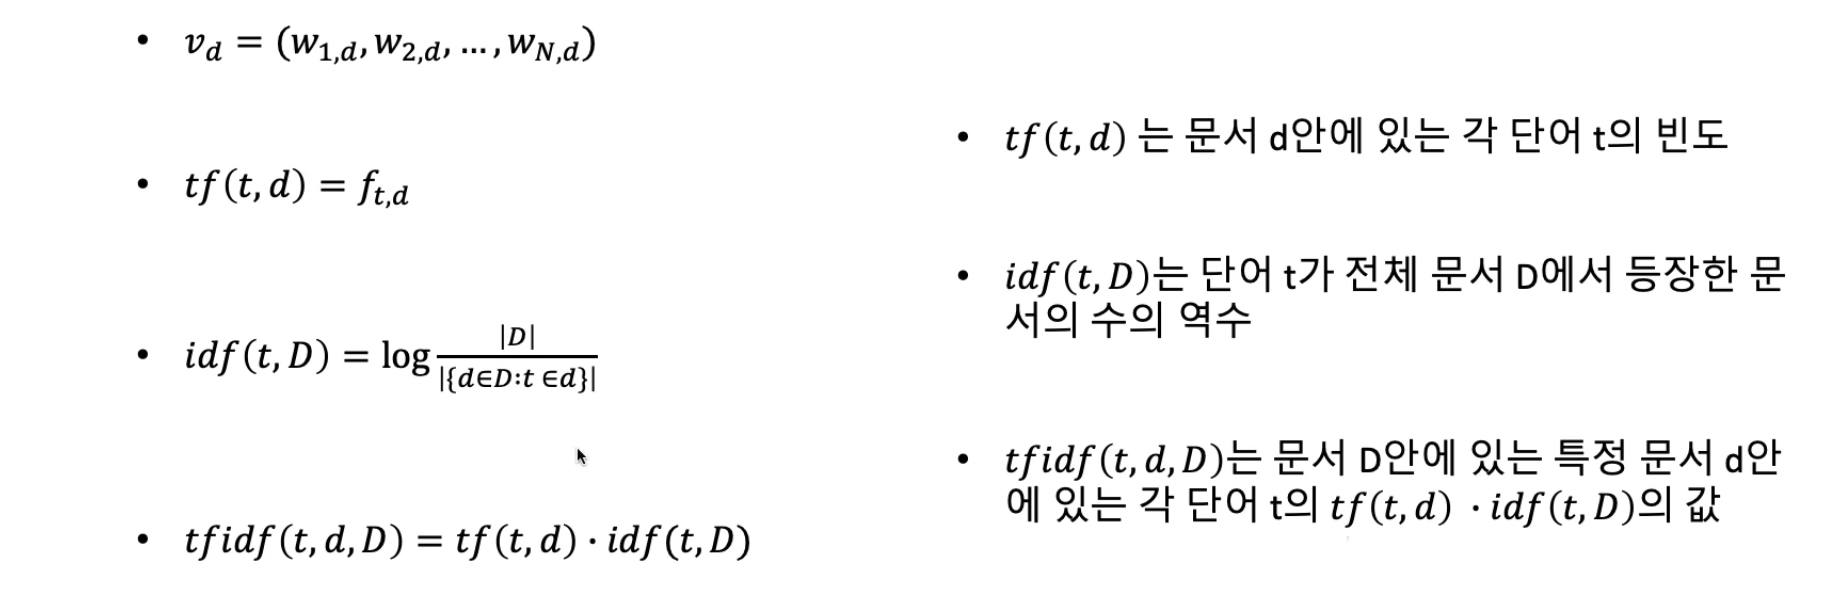

 N : 문서 집합에 등장하는 서로 다른 단어의 수
        즉, 공간의 차원
        
 tf(t, d) : 문서 d안에 있는 각 단어 t의 빈도
 
 df : document frequency : 어떤 단어가 등장한 문서의 수 
 ex) 문서가 3개 있는데 그 단어가 문서 1개에 만 있으면 그 단어의 df는 1이다. 
 df가 크다. = 단어 t가 거의 모든 문서에 있다 ex) the, an, a, ..
 
 idf = 1/df : idf는 특정문서에만 나오면 값이 높게 나온다.  
 
 tfidf(t, d, D) = tf(t, d) * idf(t, D) : 단어의 중요도, 키워드 를 아는데 쓰일 수 있다. 


## 3. 텍스트 분석
: 텍스트가 가지고 있는 숨어있는 의미를 파악하는 모든 기법
언어 모델, 머신 러닝 기법, 통계적 분석 기법 들이 쓰임
정보 검색,토픽 모델링, **감정 분석**, 문서 분류 등이 있음 

### 1) 토픽 모델링 : 문서들이 가지고 있는 여러가지 토픽을 찾아주는 기법
    - 토픽을 단어의 묶음으로 정의하고, 하나의 문서에 여러 개의 토픽이 있을 수 있다고 가정
    - 토픽 모델링의 결과로 모든 단어들이 각 토픽에 속할 확률( = 토픽 모델링)이 계산되어 나옴. 
    - 대표적인 방법으로 Latent Dirichlet Allocation(LDA) , Author Topic Model(ATM), Dynamic Topic Model(DTM)등이 있음
    
### 2) 감정 분석 : 텍스트에 포함된 저자의 의견을 찾아내는 기법
    - 가장 쉬운 예시로 '긍정', '부정' 파악하는 모델이 있다. 
    - 확장된 개념으로 "opinion Mining"이라고도 불린다. 
    - 지도 학습의 개념으로 텍스트 분류 방법으로 사용되거나 , 비지도 학습의 개념으로 문맥을 파악하여 의견을 찾아내는 방법이 있음
    
### 3) 텍스트 분류 : 텍스트를 지정한 카테고리로 분류하는 기법
    - 텍스트 분석 방법 중 가장 많이 사용되는 기법
    - 예를 들어, 뉴스기사 분류 - 문화, 연예, 날씨.. 
    - 대부분 지도 학습 방법을 사용 하고 현재는 딥러닝 모델을 많이 사용한다. 

## 4. 텍스트 시각화 
: 텍스트 분석 결과를 도표나 그래프로 시각화 하는 과정
예) wordcloud, semantic network analysis

#### 1) WordCloud : 텍스트에 있는 키워드들을 다양한 크기와 색깔로 표현해주는 기법
    -중요도(보통은 빈도) 별로 색깔과 크기가 다름
    - 생성기 
        - http://wordcloud.kr/
        - https://www.worldclouds.com/
        - https://pypi.org.project.wordcloud/ (python library)
        
#### 2) 의미 연결망 분석(Semantic Network Analysis)
    - 그래프의 노드에 단어를, 노드 간 연결에 단어 사이의 관계를 정의하여 연결
    - 문서에서 등장하는 키워드 간의 관계를 분석하기 위해 사용
    - 노드에 단어가 아닌 문장, 문서도 가능하고 
        노드간 연결을 단어들의 동시 등장 횟수나, 문서 벡터 사이의 거리로 정의하는 응용이 가능. 